In [3]:
#Importing various modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix

import seaborn as sns

In [4]:
data=pd.read_csv("data.csv") #reads the csv file
X=data.iloc[:,1:] #leaves out the first column and takes an array of other columns as X
y=data.iloc[:,0] #assigns label i.e. the first column as Y

scaler=StandardScaler() #a standardizing tool for better results
X=scaler.fit_transform(X) #fits the data to unit variance(shows how spread out our data is)

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) #training and testing data is divided into 80/20 ratio

model=LogisticRegression(max_iter=2059,random_state=52) #loads the model and sets the max iterations for better results
model.fit(X_train,y_train)#fits the training dataset into the model

LogisticRegression(max_iter=2059, random_state=52)

In [6]:
y_predicted = model.predict(X_test)#predicts the results
y_predicted_probability=model.predict_proba(X_test)#gives the predicted probability for each class

accuracy=accuracy_score(y_test,y_predicted) #returns the accuracy of the model
loss=log_loss(y_test,y_predicted_probability) #how far the predicted values are from original values

print("Accuracy:",accuracy)
print("Log loss",loss)

Accuracy: 0.8426666666666667
Log loss 0.5165413484907294


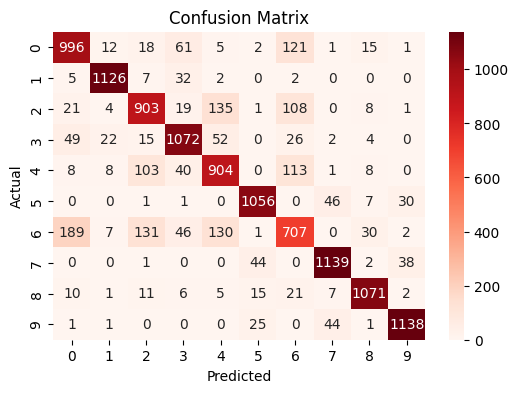

In [7]:
#prints a confusion matrix which shows the predicted vs actual results values
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='d',cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()